# Data Fitting for the Deterministic SEMHIRF Model

## Packages, Imports

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

from scipy.integrate import odeint
!pip install lmfit
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

import warnings
warnings.filterwarnings('ignore')

# Getting the Data

In [2]:
complete_deaths = pd.read_csv('C:/Users/Asus/Desktop/ComplCovidDeaths.csv')
complete_deaths.head()

df = pd.DataFrame(complete_deaths)
data_frame =  df[['Week number','Place of death', 'Number of deaths']]
data_frame.head()

,Week number,Place of death,Number of deaths
0,1,Care home,0
1,1,Elsewhere,0
2,1,Home,0
3,1,Hospice,0
4,1,Hospital,0


### Weekly averages

In [3]:
for i in range(1, 23):
    weeki = data_frame.loc[data_frame['Week number']==i]
    weekid = weeki['Number of deaths'].sum()
    print(weekid)

0
0
0
0
0
0
0
0
0
0
0
44
241
1170
1506
1818
1406
785
439
365
220
115


In [4]:
deaths_list = [0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               
               44/7, 44/7, 44/7, 44/7, 44/7, 44/7, 44/7,
               241/7,241/7,241/7,241/7,241/7,241/7,241/7,
               1170/7,1170/7,1170/7,1170/7,1170/7,1170/7,1170/7,
               1506/7,1506/7,1506/7,1506/7,1506/7,1506/7,1506/7,
               1818/7,1818/7,1818/7,1818/7,1818/7,1818/7,1818/7,
               1406/7,1406/7,1406/7,1406/7,1406/7,1406/7,1406/7,
               785/7,785/7,785/7,785/7,785/7,785/7,785/7,
               439/7,439/7,439/7,439/7,439/7,439/7,439/7,
               365/7,365/7,365/7,365/7,365/7,365/7,365/7,
               220/7,220/7,220/7,220/7,220/7,220/7,220/7,
               115/7,115/7,115/7,115/7,115/7,115/7,115/7
              ]

deaths_list2 =[ 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0, 
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0,
               
               44/7, 44/7, 44/7, 44/7, 44/7, 44/7, 44/7,
               241/7,241/7,241/7,241/7,241/7,241/7,241/7,
               1170/7,1170/7,1170/7,1170/7,1170/7,1170/7,1170/7,
               1506/7,1506/7,1506/7,1506/7,1506/7,1506/7,1506/7,
               1818/7,1818/7,1818/7,1818/7,1818/7,1818/7,1818/7,
               1406/7,1406/7,1406/7,1406/7,1406/7,1406/7,1406/7,
               785/7,785/7,785/7,785/7,785/7,785/7,785/7,
               439/7,439/7,439/7,439/7,439/7,439/7,439/7,
               365/7,365/7,365/7,365/7,365/7,365/7,365/7,
               220/7,220/7,220/7,220/7,220/7,220/7,220/7,
               115/7,115/7,115/7,115/7,115/7,115/7,115/7]

### Daily new Deaths

(array([91., 14., 14.,  0.,  7.,  0.,  7.,  7.,  7.,  7.]),
 array([  0.        ,  25.97142857,  51.94285714,  77.91428571,
        103.88571429, 129.85714286, 155.82857143, 181.8       ,
        207.77142857, 233.74285714, 259.71428571]),
 <a list of 10 Patch objects>)

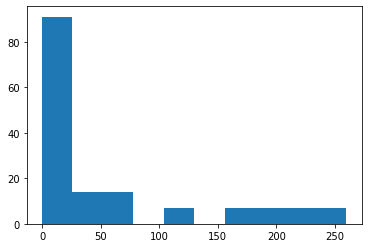

In [5]:
plt.hist( deaths_list)

### Cumulative Deaths

No handles with labels found to put in legend.


8108.999999999997


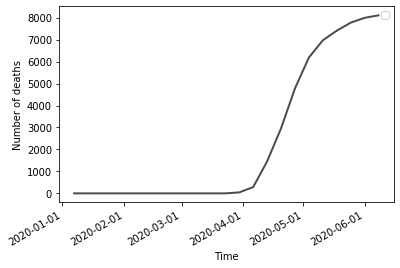

In [6]:
cum_deaths3 =np.cumsum(deaths_list2)

#print(cum_deaths3[153])
first_date = np.datetime64('2020-01-07') 
dates = pd.date_range(start=first_date, periods=154, freq="D")
f, ax = plt.subplots(1,1,figsize=(6, 4))
ax.plot(dates, cum_deaths3, 'k', alpha=0.7, linewidth=2)
ax.set_xlabel('Time')
ax.set_ylabel('Number of deaths')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
f.autofmt_xdate()


ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.9)

#plt.show()
plt.savefig('cumdeathsl.png')
print(cum_deaths3[153])

In [7]:
plt.show()
plt.savefig('cumdeathsl.png')

<Figure size 432x288 with 0 Axes>

## Plotting Model

In [8]:
plt.gcf().subplots_adjust(bottom=0.15)

def plotmodel(t, S, E, M, H, I, R, F, x_ticks=None):
    if x_ticks is None:
        f, ax = plt.subplots(1,1,figsize=(6,4))
        #ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
        #ax.plot(t, E, 'c', alpha=0.7, linewidth=2, label='Exposed')
        ax.plot(t, M, 'orange', alpha=0.7, linewidth=2, label='Mild')
        ax.plot(t, H, 'red', alpha=0.7, linewidth=2, label='Hospitalised')
        ax.plot(t, I, 'green', alpha=0.7, linewidth=2, label='Intensive Care')
        #ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
        ax.plot(t, F, 'k', alpha=0.7, linewidth=2, label='Dead')
        #ax.plot(t, S + E + M + H + I + R + F, 'c--', alpha=0.7, linewidth=2, label='Total')
        print(R[153])
        print(F[153])
        print(F[199])
        ax.set_xlabel('Time (days)')
        
       
        
    else:
        f, ax = plt.subplots(1,1,figsize=(6,4))
        ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
        ax.plot(t, E, 'r', alpha=0.7, linewidth=2, label='Exposed')
        ax.plot(t, M, 'c', alpha=0.7, linewidth=2, label='Mild')
        ax.plot(t, H, 'y', alpha=0.7, linewidth=2, label='Hospitalised')
        ax.plot(t, I, 'm', alpha=0.7, linewidth=2, label='Intensive Care')
        ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
        ax.plot(t, F, 'k', alpha=0.7, linewidth=2, label='Dead')
        ax.plot(t, S + E + M + H + I + R + F, 'c--', alpha=0.7, linewidth=2, label='Total')
        print(R[153])
        print(F[153])
        ax.set_xlabel('Time (days)')
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.grid(b=True, which='major', c='w', lw=23, ls='-')
        legend = ax.legend(borderpad=2.0)
        legend.get_frame().set_alpha(0.5)
        
        #ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_minor_locator(mdates.MonthLocator())
        f.autofmt_xdate()
    
        
    #ax.title.set_text('SEMHIFR-Model')

   
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.9)
    #for spine in ('top', 'right', 'bottom', 'left'):
     #   ax.spines[spine].set_visible(False)
   
    plt.savefig('Prediction.png', dpi=150)
    
    plt.show();
    
def plotmodel2(t, S, E, M, H, I, R, F, x_ticks=None):
    f, ax = plt.subplots(1,1,figsize=(6,4))
    if x_ticks is None:
        ax.plot(t, F, 'k', alpha=0.7, linewidth=2)   
        ax.set_xlabel('Days')
        ax.set_xlabel('Time (days)')
        ax.set_ylabel('Number of deaths')
    
    else:
        ax.plot(t, F, 'k', alpha=0.7, linewidth=2)
        ax.set_xlabel('Time (days)')
        ax.set_ylabel('Number of deaths')
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_minor_locator(mdates.MonthLocator())
#f.autofmt_xdate()
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.9)
    
    plt.savefig('Death forecast.png', dpi=150)
    plt.show();
    
    
def plotmodel3(t, S, E, M, H, I, R, F, x_ticks=None):
    f, ax = plt.subplots(1,1,figsize=(6,4))
    if x_ticks is None:
        ax.plot(t, F, 'k', alpha=0.7, linewidth=2, label='Fatalities') 
        ax.plot(t, M, 'orange', alpha=0.7, linewidth=2, label='Mild') 
        ax.plot(t, H, 'r', alpha=0.7, linewidth=2, label='Hospitalised') 
        ax.plot(t, I, 'g', alpha=0.7, linewidth=2, label='Intensive Care') 
        
        ax.set_xlabel('Time (days)')
        #ax.set_ylabel('Number of deaths')
    
    else:
        ax.plot(t, F, 'k', alpha=0.7, linewidth=2)
        ax.set_xlabel('Time (days)')
        #ax.set_ylabel('Number of deaths')
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_minor_locator(mdates.MonthLocator())
#f.autofmt_xdate()
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.9)
    
    plt.savefig('Death forecast.png', dpi=150)
    plt.show();

        
    


<Figure size 432x288 with 0 Axes>

# Model

In [9]:
def seirmodel(y, t, N, beta_M, beta_H, beta_I, gamma_M, gamma_H, gamma_I, t_EM, t_MH, t_HI, t_IF, p_H, p_I, p_F):
    S, E, M, H, I, R, F = y

    dSdt = -(beta_M(t) * M + beta_H * H + beta_I * I)* S / N
    dEdt = (beta_M(t)* M + beta_H * H + beta_I * I)* S / N - E / t_EM
    dMdt = E / t_EM - gamma_M * M - p_H * M / t_MH
    dHdt = p_H * M / t_MH - gamma_H * H - p_I * H / t_HI
    dIdt = p_I * H / t_HI - gamma_I * I - p_F * I / t_IF
    
    dRdt = gamma_M * M + gamma_I * I + gamma_H * H
    dFdt = p_F * I / t_IF
    return dSdt, dEdt, dMdt, dHdt, dIdt, dRdt, dFdt

In [10]:
N = 9_304_016

beta_H = 0.15
beta_I = 0.15


gamma_M = 1/7
gamma_H = 1/7
gamma_I = 1/7
t_EM = 5.1
t_MH = 6.9
t_HI = 4.5
t_IF = 6.1
#p_H = 0.05
#p_I = 0.05
#p_F = 0.7
outbreak_shift = 0
days = 154+outbreak_shift

def logistic_R_0(t, R_0_start, k, x0, R_0_end):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def Model(days, p_H, p_I, p_F, R_0_start, k, x0, R_0_end):

    def beta_M(t):
        return logistic_R_0(t, R_0_start, k, x0, R_0_end) * gamma_M

    

    S0, E0, M0, H0, I0, R0, F0 =N-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0
    y0= S0, E0, M0, H0, I0, R0, F0
    
    t = np.linspace(0, days-1, days)
    ret = odeint(seirmodel, y0, t, args=(N, beta_M, beta_H, beta_I, gamma_M, gamma_H, gamma_I, t_EM, t_MH, t_HI, t_IF, p_H, p_I, p_F))
    S, E, M, H, I, R, F = ret.T
    

    return t, S, E, M, H, I, R, F

752561.7768508715
1968.5208673245563


IndexError: index 199 is out of bounds for axis 0 with size 154

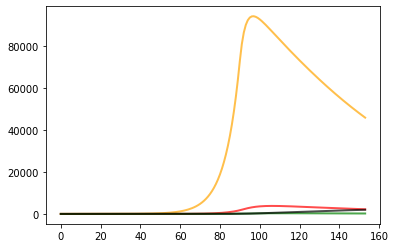

In [11]:
plotmodel(*Model( days, p_H=0.05, p_I=0.1, p_F=0.7, R_0_start=3.4,x0=90, k=5.5,R_0_end=0.9))
plotmodel2(*Model( days, p_H=0.05, p_I=0.1, p_F=0.7, R_0_start=3.4,x0=90, k=5.5,R_0_end=0.9))

# Fitting to Data

In [72]:
data = cum_deaths3

#estimation worked best with outbreak_shift=0
outbreak_shift = 0
days = outbreak_shift + len(data)
if outbreak_shift >= 0:
    y_data = np.concatenate((np.zeros(outbreak_shift), data))
else:
    y_data = y_data[-outbreak_shift:]

# parameters
params_init_min_max = { "p_H": (0.1, 0.1, 0.15), "p_I":(0.2, 0.15, 0.23), "p_F":(0.3, 0.2, 0.5), "R_0_start": (3.5, 1.0, 3.9), "k": (0.2, 0.01, 0.35), "x0": (76, 65, 97), "R_0_end": (0.6, 0.25, 0.9)}





x_data = np.linspace(0, days - 1, days, dtype=int)  # x_data is just [0, 1, ..., max_days] array

def fitter(x, p_H, p_I, p_F, R_0_start, k, x0, R_0_end):
    ret = Model(days, p_H, p_I, p_F , R_0_start,k, x0, R_0_end )
    
    return ret[7][x]


In [73]:
mod = lmfit.Model(fitter)

for kwarg, (init, mini, maxi) in params_init_min_max.items():
    mod.set_param_hint(str(kwarg), value=init, min=mini, max=maxi, vary=True)

params = mod.make_params()
fit_method = "leastsq"

In [74]:
result = mod.fit(y_data, params, method="least_squares", x=x_data)

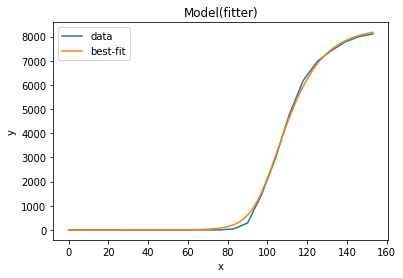

In [75]:
result.plot_fit(dates,datafmt="-")
plt.savefig('best fit2.png')

In [76]:
#parameter estimates
result.best_values

{'p_H': 0.10000000000006604,
 'p_I': 0.15000000000000002,
 'p_F': 0.4999999995245076,
 'R_0_start': 3.84557872205583,
 'k': 0.3499999999999999,
 'x0': 89.8430278736151,
 'R_0_end': 0.25000000000000006}

# Forecasting


### Number of Deaths

In [ ]:
plotmodel2(*Model(200, 0.10000000000000002,0.1,0.43, 4.0,0.4,89,0.30000000000000004))
#plt.savefig('death forecast.png')
#plt.show()

### All compartments

No handles with labels found to put in legend.


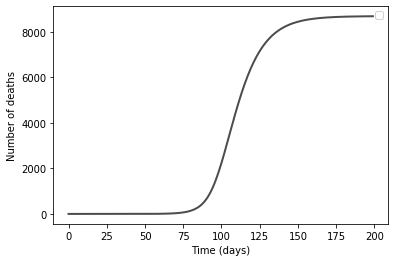

In [82]:
plotmodel2(*Model(200,0.1, 0.15, 0.5, 3.86, 0.35, 89.85, 0.24))

### M, H, I, F Compartments

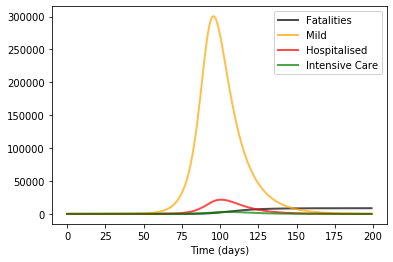

In [81]:
plotmodel3(*Model(200,0.1, 0.15, 0.5, 3.86, 0.35, 89.85, 0.24))